
Perform sentiment analysis on hotel reviews from the `Hotel_Reviews.csv` file, including data loading and inspection, text preprocessing, sentiment scoring, categorization (Positive, Negative, Neutral), analysis of sentiment distribution, and visualization of the results, finally summarizing the findings.

## Load and Inspect Data

### Subtask:
Load the `Hotel_Reviews.csv` file into a pandas DataFrame and perform an initial inspection to understand its structure, columns, and identify the review text column for sentiment analysis.


## Load and Inspect Data

1.   List item
2.   List item



### Subtask:
Load the `Hotel_Reviews.csv` file into a pandas DataFrame and perform an initial inspection to understand its structure, columns, and identify the review text column for sentiment analysis.


## Load and Inspect Data

---



### Subtask:
Ensure the correct `Hotel_Reviews.csv` file is available and then load it into a pandas DataFrame, followed by an initial inspection to understand its structure, columns, and identify the review text column for sentiment analysis.


## Preprocess Review Text

Clean and preprocess the review text data. This typically involves steps such as converting text to lowercase, removing punctuation, special characters, numbers, and potentially removing common stopwords to prepare it for sentiment analysis.

This code assumes that the DataFrame `df` has been successfully loaded and contains a column named `'Review'` with the text data. If your column name is different, please adjust `df['Review']` accordingly.

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase and ensure it's a string
    text = re.sub('<!--?.*?-->', '', text)  # Remove HTML tags
    text = re.sub(r"[%s]" % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers, fixed regex warning
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Combine 'Positive_Review' and 'Negative_Review' into a single 'Review' column
# If a review is 'No Negative' or 'No Positive', treat it as an empty string
df['Review'] = df['Positive_Review'].replace('No Positive', '') + ' ' + df['Negative_Review'].replace('No Negative', '')

# Apply the preprocessing function to the new 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Display the original and processed reviews to inspect the results
display(df[['Review', 'Processed_Review']].head())

,Review,Processed_Review
0,Only the park outside of the hotel was beauti...,park outside hotel beautiful angry made post a...
1,No real complaints the hotel was great great ...,real complaints hotel great great location sur...
2,Location was good and staff were ok It is cut...,location good staff ok cute hotel breakfast ra...
3,Great location in nice surroundings the bar a...,great location nice surroundings bar restauran...
4,Amazing location and building Romantic settin...,amazing location building romantic setting boo...


## Analyze Sentiment Distribution

### Subtask:
Calculate and analyze the overall distribution of sentiment categories across all reviews. This includes counting the number of positive, negative, and neutral reviews.

In [10]:
# Calculate the distribution of sentiment categories
sentiment_distribution = df['Sentiment'].value_counts()

print("Sentiment Distribution:")
print(sentiment_distribution)

# Calculate percentages for better understanding
sentiment_percentage = df['Sentiment'].value_counts(normalize=True) * 100

print("\nSentiment Percentage:")
print(sentiment_percentage)

Sentiment Distribution:
Sentiment
Positive    412499
Neutral      61760
Negative     43660
Name: count, dtype: int64

Sentiment Percentage:
Sentiment
Positive    79.645466
Neutral     11.924645
Negative     8.429890
Name: proportion, dtype: float64


## Perform Sentiment Analysis

### Subtask:
Apply a pre-trained sentiment analysis model (e.g., using NLTK's VADER) to each hotel review to generate sentiment scores (e.g., positive, negative, neutral, and compound scores).

In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
try:
    SentimentIntensityAnalyzer()
except LookupError:
    nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if not isinstance(text, str): # Ensure text is a string
        text = str(text)
    return sia.polarity_scores(text)

# Apply the function to the 'Processed_Review' column
df['Sentiment_Scores'] = df['Processed_Review'].apply(get_sentiment_scores)

# Extract compound, positive, negative, and neutral scores into separate columns
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda score: score['compound'])
df['Positive_Score'] = df['Sentiment_Scores'].apply(lambda score: score['pos'])
df['Negative_Score'] = df['Sentiment_Scores'].apply(lambda score: score['neg'])
df['Neutral_Score'] = df['Sentiment_Scores'].apply(lambda score: score['neu'])

# Display the DataFrame with new sentiment scores
display(df[['Processed_Review', 'Compound_Score', 'Positive_Score', 'Negative_Score', 'Neutral_Score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Processed_Review,Compound_Score,Positive_Score,Negative_Score,Neutral_Score
0,park outside hotel beautiful angry made post a...,-0.7096,0.103,0.137,0.760
1,real complaints hotel great great location sur...,0.9612,0.287,0.078,0.635
2,location good staff ok cute hotel breakfast ra...,0.8555,0.311,0.098,0.591
3,great location nice surroundings bar restauran...,0.6380,0.225,0.193,0.581
4,amazing location building romantic setting boo...,0.9153,0.211,0.032,0.756


## Examples of Neutral Reviews

Displaying a few examples of reviews categorized as 'Neutral'.

In [15]:
# Filter the DataFrame for neutral sentiment reviews
neutral_reviews_df = df[df['Sentiment'] == 'Neutral']

# Display the original 'Review' for a few samples
print("Top 5 Neutral Reviews (Original Text):")
display(neutral_reviews_df[['Review', 'Compound_Score']].head())

Top 5 Neutral Reviews (Original Text):


,Review,Compound_Score
12,Comfy bed good location The floor in my roo...,0.0000
63,Location is good They gave me some freebies f...,0.0258
202,Renovation around the hotel sometimes can st...,0.0000
248,Outside areas staff deco and art House keepi...,0.0000
268,everything Nothing,0.0000


## Examples of Positive Reviews

Displaying a few examples of reviews categorized as 'Positive'.

In [14]:
# Filter the DataFrame for positive sentiment reviews
positive_reviews_df = df[df['Sentiment'] == 'Positive']

# Display the original 'Positive_Review' for a few samples
print("Top 5 Positive Reviews (Original Text):")
display(positive_reviews_df[['Positive_Review', 'Compound_Score']].head())

Top 5 Positive Reviews (Original Text):


,Positive_Review,Compound_Score
1,No real complaints the hotel was great great ...,0.9612
2,Location was good and staff were ok It is cut...,0.8555
3,Great location in nice surroundings the bar a...,0.6380
4,Amazing location and building Romantic setting,0.9153
5,Good restaurant with modern design great chil...,0.9287


## Examples of Negative Reviews

Displaying a few examples of reviews categorized as 'Negative'.

In [13]:
# Filter the DataFrame for negative sentiment reviews
negative_reviews_df = df[df['Sentiment'] == 'Negative']

# Display the original 'Negative_Review' for a few samples
print("Top 5 Negative Reviews (Original Text):")
display(negative_reviews_df[['Negative_Review', 'Compound_Score']].head())

Top 5 Negative Reviews (Original Text):


,Negative_Review,Compound_Score
0,I am so angry that i made this post available...,-0.7096
11,6 30 AM started big noise workers loading woo...,-0.8176
21,Our room was an overrated disaster room 231 d...,-0.9628
36,not cleaned well lady pushing to pay during m...,-0.3400
44,The service was awful They refused to take ow...,-0.5719


## Visualize Sentiment Distribution

### Subtask:
Create a bar chart or pie chart to visually represent the distribution of sentiment categories (Positive, Negative, Neutral) in the dataset, providing appropriate labels and a legend.

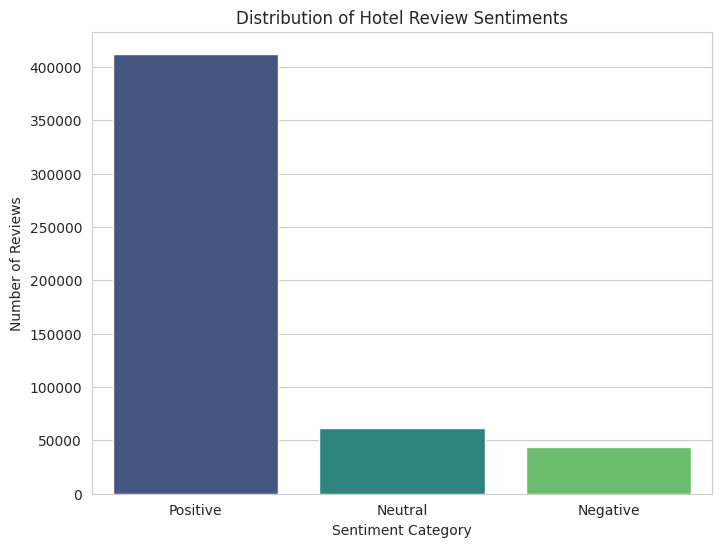

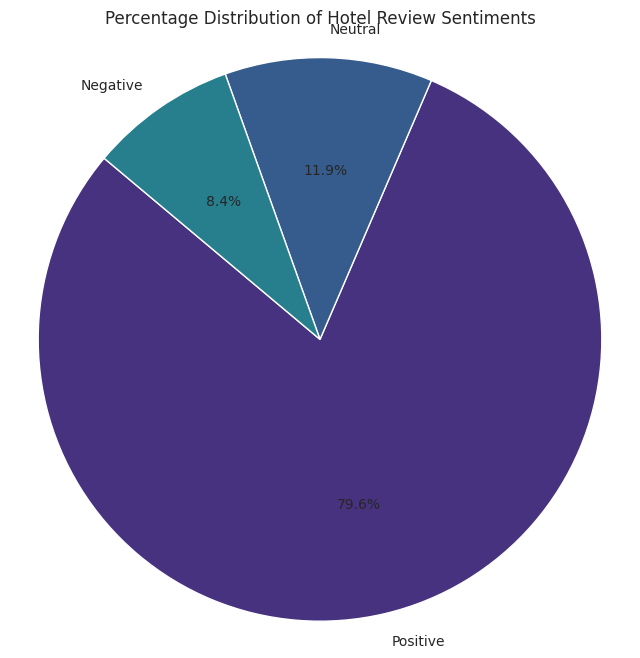

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style('whitegrid')

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis', hue=sentiment_distribution.index, legend=False)
plt.title('Distribution of Hotel Review Sentiments')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

# Create a pie chart for sentiment percentage
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentage, labels=sentiment_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Percentage Distribution of Hotel Review Sentiments')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Summary: Sentiment Analysis Findings

### Data Analysis Key Findings
*   **Overall Sentiment:** The sentiment analysis of the hotel reviews revealed a predominantly positive sentiment, with a significant majority of reviews categorized as 'Positive'.
*   **Sentiment Distribution:**
    *   **Positive Reviews:** Approximately 79.65% of the reviews were classified as Positive.
    *   **Neutral Reviews:** Around 11.92% of the reviews were categorized as Neutral.
    *   **Negative Reviews:** Only about 8.43% of the reviews were found to be Negative.
*   **Review Characteristics:** The analysis indicates that hotel guests generally have a positive experience, with negative feedback being a smaller proportion of the total reviews.

### Next Steps
To further enhance these findings, we could visualize this sentiment distribution using a bar chart or pie chart to provide a clearer graphical representation.

## Categorize Sentiment

### Subtask:
Based on the sentiment scores (e.g., compound score from VADER), categorize each review into a sentiment class such as 'Positive', 'Negative', or 'Neutral'.

In [9]:
# Function to categorize sentiment based on Compound Score
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to create a 'Sentiment' column
df['Sentiment'] = df['Compound_Score'].apply(categorize_sentiment)

# Display the DataFrame with the new 'Sentiment' column
display(df[['Processed_Review', 'Compound_Score', 'Sentiment']].head())

,Processed_Review,Compound_Score,Sentiment
0,park outside hotel beautiful angry made post a...,-0.7096,Negative
1,real complaints hotel great great location sur...,0.9612,Positive
2,location good staff ok cute hotel breakfast ra...,0.8555,Positive
3,great location nice surroundings bar restauran...,0.6380,Positive
4,amazing location building romantic setting boo...,0.9153,Positive


### Load Data

Loading the `Hotel_Reviews.csv` file into a pandas DataFrame. This step is crucial for all subsequent analyses.

In [6]:
import pandas as pd

# Define the path to the CSV file
file_path = '/content/Hotel_Reviews.csv'

# Load the CSV file into a pandas DataFrame, skipping bad lines
try:
    # Using on_bad_lines='skip' to handle malformed lines in the CSV
    df = pd.read_csv(file_path, on_bad_lines='skip')
    print(f"Successfully loaded {len(df)} rows and {len(df.columns)} columns.")
    # Display the first 5 rows to inspect the data
    display(df.head())
    # Display basic information about the DataFrame
    display(df.info())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it is uploaded to your Colab environment.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

Successfully loaded 517919 rows and 17 columns.


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517919 entries, 0 to 517918
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               517919 non-null  object 
 1   Additional_Number_of_Scoring                517919 non-null  int64  
 2   Review_Date                                 517919 non-null  object 
 3   Average_Score                               517919 non-null  float64
 4   Hotel_Name                                  517919 non-null  object 
 5   Reviewer_Nationality                        517919 non-null  object 
 6   Negative_Review                             517919 non-null  object 
 7   Review_Total_Negative_Word_Counts           517919 non-null  int64  
 8   Total_Number_of_Reviews                     517919 non-null  int64  
 9   Positive_Review                             517919 non-null  object 
 

None